# Project 2 of Udacity Data Analyst Nanodegree

** Analyzing Titanic passenger survival dataset **

In this ipython notebook, we are going to analyze the Titanic Passenger dataset as provided by udacity.

The Question we are going to answer is...

What are the charcteristics of passengers who survived compared to the one who don't?


In [195]:
# Let's import the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# Read the csv dataset file into a pandas DataFrame. 
titanic_df = pd.read_csv('titanic_data.csv')

In [197]:
# Let's look at some of the rows from the data to get some sense of what we are dealing with.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [199]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Notes so far...**
* The data looks quite clean and ready for some exploratory analysis.
* We don't have lot of missing records except for the in the Age column.

Now, Let's look at the various columns on what kind of data we have in them. One way to do that is to look at how many different kind of values each column has.

In [200]:
def column_uniques(column):
    unique_values = list(column.unique())
    count_unique = len(unique_values)
    return column.name, count_unique, unique_values
            
#column_uniques(titanic_df['Sex'])    
print titanic_df.apply(column_uniques)

PassengerId    (PassengerId, 891, [1, 2, 3, 4, 5, 6, 7, 8, 9,...
Survived                                   (Survived, 2, [0, 1])
Pclass                                    (Pclass, 3, [3, 1, 2])
Name           (Name, 891, [Braund, Mr. Owen Harris, Cumings,...
Sex                                     (Sex, 2, [male, female])
Age            (Age, 89, [22.0, 38.0, 26.0, 35.0, nan, 54.0, ...
SibSp                          (SibSp, 7, [1, 0, 3, 4, 2, 5, 8])
Parch                          (Parch, 7, [0, 1, 2, 5, 3, 4, 6])
Ticket         (Ticket, 681, [A/5 21171, PC 17599, STON/O2. 3...
Fare           (Fare, 248, [7.25, 71.2833, 7.925, 53.1, 8.05,...
Cabin          (Cabin, 148, [nan, C85, C123, E46, G6, C103, D...
Embarked                           (Embarked, 4, [S, C, Q, nan])
dtype: object


We have some seen notable things about the days so far...
* We got the 'Survived field which has either of 2 values - 0 or 1. 0 means the passenger didn't survive, 1 means the passenger survived. 
* Sex field got either of 2 values male or female. 
* Pclass column has 3 kinds of values - 1,2 or 3.
* Age has nice numeric values ranging from 0.42 to 80. 
* SibSp stands for total number of siblings and/or spouse the passenger had with onboard. The values range from 0 to 8 with no passengers having 6 or 7.
* Parch stands for Number of parents/children abroad
* We can ignore the PassengerId as it's a unique id field for every passenger. 
* We can also ignore Name, Cabin, Ticket and Emabrked.
* Fare can be safely ignored also as Pclass seems to be a better predictor of the wealth of the passenger.

So, we are going to look at how below fields' values affected the survival (0 or 1). 
* Sex
* Age
* Pclass

Let's explore this further by grouping the data on these fields...

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


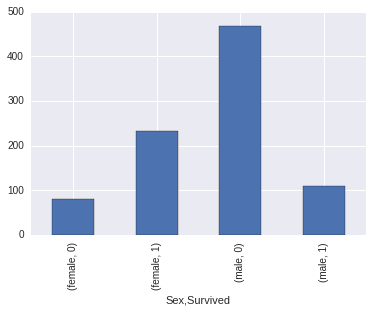

In [201]:
# group by sex and run the visualizations
sex_grouping = titanic_df[['Sex', 'Survived']].groupby(['Sex', 'Survived']).size()
print sex_grouping
sex_grouping.plot.bar()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


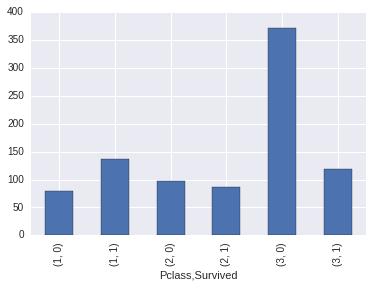

In [202]:
# Grouping by the Class of the passengers
grouping_by_class = titanic_df[['Pclass', 'Survived']].groupby(['Pclass', 'Survived']).size()
print grouping_by_class
grouping_by_class.plot.bar()

age_group  Survived
(0, 10]    0            26
           1            38
(10, 20]   0            71
           1            44
(20, 30]   0           146
           1            84
(30, 40]   0            86
           1            69
(40, 50]   0            53
           1            33
(50, 60]   0            25
           1            17
(60, 70]   0            13
           1             4
(70, 80]   0             4
           1             1
dtype: int64


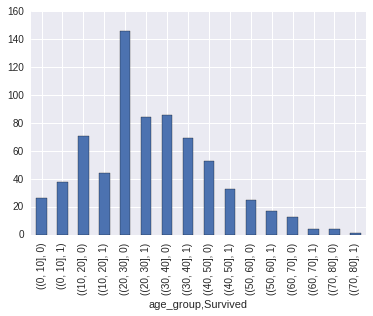

In [203]:
# Grouping by age of the passengers
titanic_df['age_group'] = pd.cut(titanic_df['Age'], np.arange(0, 90, 10))
grouping_by_age = titanic_df[['age_group', 'Survived']].groupby(['age_group', 'Survived']).size()
print grouping_by_age
grouping_by_age.plot.bar()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
dtype: int64


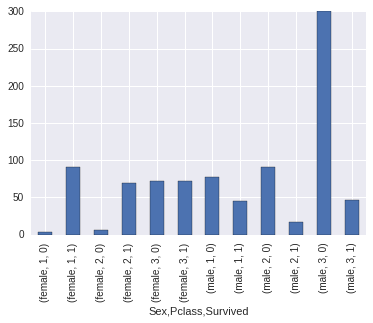

In [204]:
# Group by both sex and class
grouping_by_sexnclass = titanic_df[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass', 'Survived']).size()
print grouping_by_sexnclass
grouping_by_sexnclass.plot.bar()

# Key Findings Summarized

Based on this dataset, below subgroups had better chance of survival..
* females passengers
* class 1 passengers
* children less then 10 years

Below subgroups had lesser chance of survival...
* male passengers
* class 3 passengers
* older passengers

To summarize, sex, class and age had a major impact on whether the passenger survived the titanic sinking or not.
However, these resu;ts are based on the data present and there are exceptions to these findings. There might be other factors impacting the survival outcome(like sheer tenacity of certain passengers).


** Appendix **

Below resources were referred as part of the analysis to get some background information
1. https://www.kaggle.com/c/titanic/data
2. Wikipedia